<a href="https://colab.research.google.com/github/newbiepawel/RNN/blob/master/rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
url = 'https://raw.githubusercontent.com/krishnaik06/Stock-Price-Prediction-using-Keras-and-Recurrent-Neural-Networ/master/Google_Stock_Price_Train.csv'

In [0]:

dataset_train = pd.read_csv(url)


In [0]:
training_set = dataset_train.iloc[:, 1:2].values

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [0]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


In [0]:
# Reshaping

# Initialising the RNN
model = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units = 1))


In [0]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [0]:
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0522
Epoch 2/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0060
Epoch 3/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0055
Epoch 4/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0047
Epoch 5/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0052
Epoch 6/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0048
Epoch 7/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0044
Epoch 8/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0049
Epoch 9/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0043
Epoch 10/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0047
Epoch 11/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0042
Epoch 12/100
1198/1198 [==============================] - 6s 5ms/step - l

In [0]:
from google.colab import files

uploaded = files.upload()


Saving Google_Stock_Price_Test.csv to Google_Stock_Price_Test (1).csv


In [0]:
import io
dataset_test = pd.read_csv(io.BytesIO(uploaded['Google_Stock_Price_Test.csv']))

In [0]:
real_stock_price = dataset_test.iloc[:, 1:2].values


In [0]:

dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


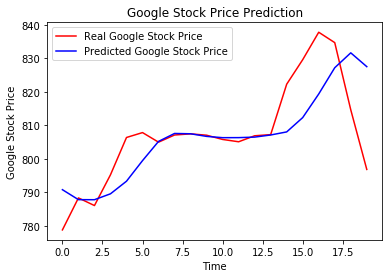

In [0]:

plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()